<a href="https://colab.research.google.com/github/FariaTabassum/Machine-learing-master-class/blob/main/iris_data_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libraries**

In [1]:
import pandas as pd #useful for loading dataset
import numpy as np #to perform array

### **Choose Dataset file from Local Directory**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


### **load Dataset**

In [3]:
df = pd.read_csv('iris.csv')
print(df) 

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### **Summarize dataset**

In [4]:
print(df.shape)
print(df.head(5))

(150, 5)
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### **Mapping**

In [5]:
i_class = set(df['class'])
df['class']= df['class'].map({'Iris-setosa':0 , 'Iris-versicolor':1 ,'Iris-virginica':2}).astype(float)
print(df.head)

<bound method NDFrame.head of      sepal length  sepal width  petal length  petal width  class
0             5.1          3.5           1.4          0.2    0.0
1             4.9          3.0           1.4          0.2    0.0
2             4.7          3.2           1.3          0.2    0.0
3             4.6          3.1           1.5          0.2    0.0
4             5.0          3.6           1.4          0.2    0.0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3    2.0
146           6.3          2.5           5.0          1.9    2.0
147           6.5          3.0           5.2          2.0    2.0
148           6.2          3.4           5.4          2.3    2.0
149           5.9          3.0           5.1          1.8    2.0

[150 rows x 5 columns]>


### **Segregate Dataset into X(Input/IndependentVariable) & Y(output/dependentVariable)**





In [6]:
X = df.iloc[:, :-1].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
Y = df.iloc[:, -1].values
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

###  **Spliting Dataset into Train & Test**




In [8]:
 from sklearn.model_selection import train_test_split
 X_train, X_test,Y_train, Y_test = train_test_split(X, Y ,test_size= 0.25 ,random_state= 0)

### **Feature Scaling**

we scale our data to make all featuewa contribute equally to the result
* Fit_Transform- fit method is calculating the mean  and variance of each of the features present in our data
*  Transform- Transform method is transforming all the features using the respective mean and variance

we want our data to be a completely new and a surprise set for our model







In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.54399532e-02 -1.19254753e-01  2.25126850e-01  3.56381749e-01]
 [-9.98450310e-02 -1.04039491e+00  1.13559562e-01 -2.86480506e-02]
 [ 1.05300481e+00 -1.19254753e-01  9.50314227e-01  1.12644135e+00]
 [-1.36797986e+00  3.41315328e-01 -1.39259884e+00 -1.31208072e+00]
 [ 1.16828980e+00  1.11030287e-01  7.27179649e-01  1.38312788e+00]
 [-1.02212490e+00  1.03217045e+00 -1.22524790e+00 -7.98707650e-01]
 [-5.60984968e-01  1.49274053e+00 -1.28103155e+00 -1.31208072e+00]
 [-1.02212490e+00 -2.42210516e+00 -1.65358660e-01 -2.85334584e-01]
 [ 7.07149859e-01 -1.19254753e-01  9.50314227e-01  7.41411549e-01]
 [ 9.37719827e-01  5.71600368e-01  1.06188152e+00  1.63981441e+00]
 [ 1.30724937e-01 -1.96153508e+00  6.71396005e-01  3.56381749e-01]
 [ 9.37719827e-01 -1.27067995e+00  1.11766516e+00  7.41411549e-01]
 [-3.30414999e-01 -1.27067995e+00  5.77759173e-02 -1.56991317e-01]
 [ 2.09056967e+00 -1.19254753e-01  1.28501609e+00  1.38312788e+00]
 [ 4.76579890e-01  5.71600368e-01  5.04045072e-01  4.84725016e

### **Finding the Best K-Value**

Text(0, 0.5, 'Mean Error')

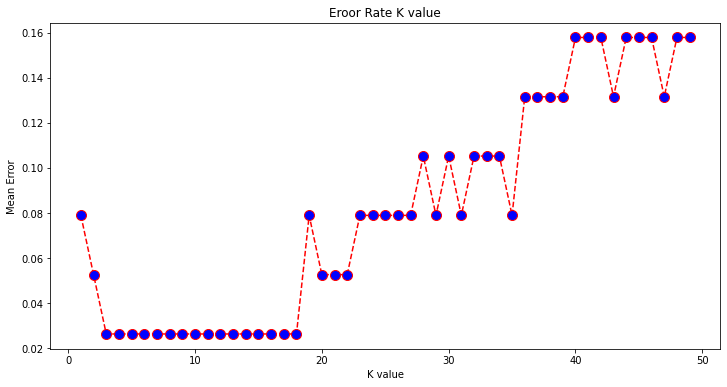

In [10]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error for K values between 1 and 50
for i in range (1,50):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train,Y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,50),error ,color='red', linestyle='dashed' ,marker='o', markerfacecolor='blue', markersize=10)
plt.title('Eroor Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

### **Training**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 18 , metric = 'minkowski' ,p = 2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=18)

### **Predicting**

In [18]:
sepal_lenght = int(float(input ("Enter New Sepal length: ")))
sepal_width = int(float(input ("Enter New Sepal Width: ")))
petal_length = int(float(input ("Enter New Petal length: ")))
petal_width = int(float(input ("Enter New Petal Width: ")))
new= [[sepal_lenght,sepal_width,petal_length,petal_width]]
result = model.predict(new)
print(result)
if  result == 2:
      print("It's belong to Irisi virginica")
elif result == 1:
    print("It's belong to Irisi versicolor")
else:
    print("It's belong to Irisi Setosa")



Enter New Sepal length: 4.4
Enter New Sepal Width: 6.8
Enter New Petal length: 4
Enter New Petal Width: 1
[2.]
It's belong to Irisi Setosa


### **Predict for all Test Data**

In [19]:
Y_pred=model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[2. 2.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [2. 1.]]


### **Evaluating model-Accuracy**

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(Y_test,Y_pred)

print ("Confusion Matrix : ")
print(cm)

print("Accuracy of the model : {0}% " . format(accuracy_score(Y_test,Y_pred)*100))

Confusion Matrix : 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy of the model : 97.36842105263158% 
